In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns


In [7]:
# Load the RNA-seq data
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.fpkm.counts.matrix.txt', sep='\t', index_col=0)

# Load the HRD score data
hrd_df = pd.read_excel('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.hrdscore.xlsx')

# Load the BRCA status data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/toga.breast.brca.status.txt', sep='\t', index_col=0)
brca_df.index = brca_df.index.str.replace('.', '-')


In [8]:
#idenfity the common samples

# Extract sample IDs from each dataframe
rnaseq_samples = set(rnaseq_df['Case ID'])
hrd_samples = set(hrd_df['sample'])
brca_samples = set(brca_df.index)

# Find the intersection of all sample IDs
common_samples = rnaseq_samples.intersection(hrd_samples).intersection(brca_samples)

# Print the number of common samples
print("\nNumber of common samples:", len(common_samples))


Number of common samples: 864


In [9]:
# Drop samples that are not common in all three dataframes
rnaseq_df_common = rnaseq_df[rnaseq_df['Case ID'].isin(common_samples)]
hrd_df_common = hrd_df[hrd_df['sample'].isin(common_samples)]
brca_df_common = brca_df[brca_df.index.isin(common_samples)]

# Print the shapes of the new dataframes
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("hrd_df_common:", hrd_df_common.shape)
print("brca_df_common:", brca_df_common.shape)

rnaseq_df_common: (929, 60663)
hrd_df_common: (864, 5)
brca_df_common: (864, 33)


In [10]:
#merge metadata

metadata = pd.merge(hrd_df_common, brca_df_common, left_on='sample', right_index=True)
metadata.set_index('sample', inplace=True)

print (metadata.shape)
print(metadata.columns)
metadata.head()

(864, 37)
Index(['HRD', 'Telomeric AI', 'LST', 'HRD-sum', 'BRCA1_somatic_null',
       'BRCA1_germ_bi_allelic', 'BRCA1_germ_mono_allelic', 'BRCA1_deletion',
       'BRCA1_epigenetic_silencing', 'BRCA1_mRNA', 'BRCA2_somatic_null',
       'BRCA2_germ_bi_allelic', 'BRCA2_germ_undetermined',
       'BRCA2_germ_mono_allelic', 'BRCA2_deletion', 'RAD51C_germ',
       'RAD51C_deletion', 'RAD51C_epigenetic_silencing', 'RAD51C_mRNA',
       'PALB2_somatic_null', 'PALB2_germ', 'TP53_somatic', 'H1', 'H2', 'H3',
       'H4', 'H1.norm', 'H2.norm', 'H3.norm', 'H4.norm', 'event.BRCA1',
       'event.BRCA2', 'event.RAD51C', 'event.PALB2', 'event.All Events',
       'event.PAM50', 'event.TNBC'],
      dtype='object')


,HRD,Telomeric AI,LST,HRD-sum,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,BRCA1_mRNA,...,H2.norm,H3.norm,H4.norm,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,0,0,0,0,0,0,0,0,0,0,...,0.044837,0.635070,0.000000,0,0,0,0,0,NaN,0
TCGA-A1-A0SD,10,10,7,27,0,0,0,0,0,0,...,0.254169,0.703974,0.041857,0,0,0,0,0,LumA,0
TCGA-A1-A0SE,6,6,1,13,0,0,0,0,0,0,...,0.102998,0.740053,0.120368,0,0,0,0,0,LumA,0
TCGA-A1-A0SF,7,11,8,26,0,0,0,0,0,0,...,0.000000,0.395329,0.604671,0,0,0,0,0,LumA,0
TCGA-A1-A0SG,3,2,4,9,0,0,0,0,0,0,...,0.183277,0.776319,0.040404,0,0,0,0,0,LumA,0


In [11]:

# Start with the original dataframe
metadata_filtered = metadata.copy()

# Drop rows where event.BRCA1 is '1'
metadata_filtered = metadata_filtered[metadata_filtered['event.BRCA1'] != '1']

# Drop rows where event.BRCA2 is 'Bi-allelic-undetermined'
metadata_filtered = metadata_filtered[metadata_filtered['event.BRCA2'] != 'Bi-allelic-undetermined']

# Drop rows where event.PALB2 is '2'
metadata_filtered = metadata_filtered[metadata_filtered['event.PALB2'] != '2']

print (metadata_filtered.shape)
print(metadata_filtered.columns)
metadata_filtered.head()

metadata = metadata_filtered
metadata['HRD_status_base'] = ['HRD' if x >= 42 else 'HR' for x in metadata['HRD-sum']]


(857, 37)
Index(['HRD', 'Telomeric AI', 'LST', 'HRD-sum', 'BRCA1_somatic_null',
       'BRCA1_germ_bi_allelic', 'BRCA1_germ_mono_allelic', 'BRCA1_deletion',
       'BRCA1_epigenetic_silencing', 'BRCA1_mRNA', 'BRCA2_somatic_null',
       'BRCA2_germ_bi_allelic', 'BRCA2_germ_undetermined',
       'BRCA2_germ_mono_allelic', 'BRCA2_deletion', 'RAD51C_germ',
       'RAD51C_deletion', 'RAD51C_epigenetic_silencing', 'RAD51C_mRNA',
       'PALB2_somatic_null', 'PALB2_germ', 'TP53_somatic', 'H1', 'H2', 'H3',
       'H4', 'H1.norm', 'H2.norm', 'H3.norm', 'H4.norm', 'event.BRCA1',
       'event.BRCA2', 'event.RAD51C', 'event.PALB2', 'event.All Events',
       'event.PAM50', 'event.TNBC'],
      dtype='object')


In [12]:
# fig = px.box(metadata, x = 'event.PAM50', y = 'HRD-sum', color='HRD_status_base')
# fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Line'))

In [13]:
def softLabel(x, median, HRD_thresh, HRP_thresh):
    adjustment = 2 * ((((HRD_thresh - x) / (HRD_thresh - HRP_thresh)) - 0.5) ** 2) + 0.5
    if median <= x < HRD_thresh:
        return adjustment
    elif HRP_thresh <= x < median:
        return 1 - adjustment
    else:
        return -1

In [14]:
medians = metadata.groupby(["event.PAM50"])["HRD-sum"].median().reset_index() 
medians_pivot = medians.set_index('event.PAM50').T
medians_pivot

event.PAM50,Basal,Her2,LumA,LumB
HRD-sum,55.0,35.0,13.0,31.0


In [15]:
for sub in medians_pivot.columns.tolist():
    metadata['HRD_adjust'] = ['HRD' if x >= 50 else 'HRP' if x <= 10 else 'HRD ambiguous' if medians_pivot.loc['HRD-sum',sub] <= x < 50 else 'HRP ambiguous' if 10 <= x < medians_pivot.loc['HRD-sum',sub] else 'None' for x in metadata['HRD-sum']]
    metadata['soft_prob'] = metadata['HRD-sum'].apply(lambda x: softLabel(x, medians_pivot.loc['HRD-sum',sub], 50, 10))

In [16]:
metadata[['HRD-sum', 'HRD_status_base', 'HRD_adjust', 'soft_prob']]

# Define conditions and choices
conditions = [
    (metadata['soft_prob'] == -1) & (metadata['HRD_adjust'] == 'HRP'),
    (metadata['soft_prob'] == -1) & (metadata['HRD_adjust'] == 'HRD')
]

choices = [0, 1]

# Update the 'soft prob dist' column
metadata['soft_prob'] = np.select(conditions, choices, default=metadata['soft_prob'])
metadata.shape

(857, 40)

In [17]:
print(metadata['HRD_adjust'].value_counts())
px.scatter(metadata, x = 'HRD-sum', y= 'soft_prob')

HRD_adjust
HRP ambiguous    320
HRP              207
HRD ambiguous    179
HRD              151
Name: count, dtype: int64


In [18]:
metadata_dropna = metadata[metadata['HRD_adjust'] != 'None']
print(metadata_dropna.shape)
metadata_dropna.head()

(857, 40)


,HRD,Telomeric AI,LST,HRD-sum,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,BRCA1_mRNA,...,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC,HRD_status_base,HRD_adjust,soft_prob
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,0,HR,HRP,0.00000
TCGA-A1-A0SD,10,10,7,27,0,0,0,0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.48875
TCGA-A1-A0SE,6,6,1,13,0,0,0,0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.13875
TCGA-A1-A0SF,7,11,8,26,0,0,0,0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.48000
TCGA-A1-A0SG,3,2,4,9,0,0,0,0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP,0.00000


In [19]:
px.box(metadata_dropna, x = 'event.PAM50', y = 'HRD-sum', color = 'HRD_adjust')

In [66]:


df=metadata_dropna.copy()

# Calculate Q1 and Q3 for lower and upper bounds
q1 = 10
q3 = 50
# Set midpoint (average of Q1 and Q3) and slope (s) for the sigmoid function
mid = (q1 + q3) / 2
s = 5  # Adjust this to control steepness of transition

# Define the sigmoid-based confidence function
def sigmoid_confidence(h):
    return 1 / (1 + np.exp(-(h - mid) / s))

# Apply the transformation to create the 'Confidence' column
df['Confidence'] = df['HRD-sum'].apply(lambda x:sigmoid_confidence(x))
df['Confidence'] = df['Confidence'].astype(float)
# Display the result
print(df.shape)
df.to_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/soft_label.tsv', sep='\t', index=True)

(857, 41)


In [67]:
px.scatter(df, x = 'HRD-sum', y = 'Confidence')

<Axes: xlabel='Confidence', ylabel='Count'>

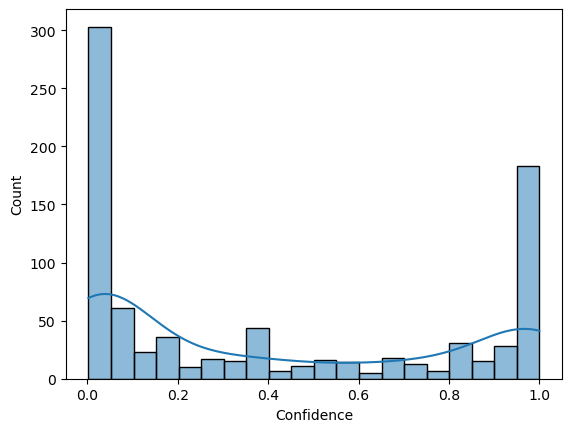

In [68]:
sns.histplot(df['Confidence'], bins=20, kde=True)

In [72]:
print(df['Confidence'].dtype)
df['Confidence'].value_counts().astype(float)


float64


Confidence
0.014774    29.0
0.012128    28.0
0.006693    27.0
0.017986    24.0
0.032295    24.0
            ... 
0.999983     1.0
0.999991     1.0
0.999945     1.0
0.003684     1.0
0.999970     1.0
Name: count, Length: 91, dtype: float64

In [74]:
# Extract values with very low confidence (≤ 0.05)
hi_c_low = df[df['Confidence'] <= 0.05]

# Extract values with very high confidence (≥ 0.95)
hi_c_high = df[df['Confidence'] >= 0.95]

# Create ambiguous category (values between 0.05 and 0.95)
amb = df[(df['Confidence'] > 0.05) & (df['Confidence'] < 0.95)]

In [79]:
hi_c_high['Confidence'].astype(float)
hi_c_low['Confidence'].astype(float)
amb['Confidence'].astype(float)

sample
TCGA-A1-A0SD    0.354344
TCGA-A1-A0SF    0.310026
TCGA-A1-A0SH    0.689974
TCGA-A1-A0SJ    0.450166
TCGA-A1-A0SK    0.832018
                  ...   
TCGA-OL-A5DA    0.119203
TCGA-OL-A5RZ    0.197816
TCGA-OL-A66P    0.689974
TCGA-PE-A5DD    0.167982
TCGA-PE-A5DE    0.598688
Name: Confidence, Length: 371, dtype: float64

In [80]:
print(hi_c_low.shape, hi_c_high.shape, amb.shape)

(303, 41) (183, 41) (371, 41)


In [81]:
print(hi_c_low['event.PAM50'].value_counts())

print(hi_c_high['event.PAM50'].value_counts())

print(amb['event.PAM50'].value_counts())

event.PAM50
LumA     255
LumB      37
Basal      5
Her2       1
Name: count, dtype: int64
event.PAM50
Basal    91
LumB     50
LumA     21
Her2     19
Name: count, dtype: int64
event.PAM50
LumA     154
LumB     106
Her2      55
Basal     49
Name: count, dtype: int64


In [85]:
from sklearn.utils import resample

def balance_to_approx(df, target_n, category_column='event.PAM50'):
    balanced_dfs = []
    print(f"\nBalancing dataframe with {len(df)} samples")
    # Filter out NaN values and get unique categories
    categories = df[category_column].dropna().unique()
    
    for category in categories:  # Now we only iterate over non-NaN categories
        category_df = df[df[category_column] == category]
        print(f"Category {category}: {len(category_df)} samples")
        # If we have fewer samples than target, take all of them
        if len(category_df) < target_n:
            resampled = category_df
        else:
            resampled = resample(category_df,
                               n_samples=target_n,
                               replace=False,
                               random_state=42)
        balanced_dfs.append(resampled)
    result = pd.concat(balanced_dfs)
    print(f"After balancing: {len(result)} samples")
    return result

print("Original shapes:")
print(f"hi_c_low: {hi_c_low.shape[0]}")
print(f"hi_c_high: {hi_c_high.shape[0]}")
print(f"amb: {amb.shape[0]}")
total_before = hi_c_low.shape[0] + hi_c_high.shape[0] + amb.shape[0]
print(f"Total before: {total_before}")

# Balance to ~20 samples per subtype where possible
train_low = balance_to_approx(hi_c_low, target_n=20)
train_high = balance_to_approx(hi_c_high, target_n=20)

# Everything else goes to test
train_indices = train_low.index.union(train_high.index)
test = df[~df.index.isin(train_indices)]

print("\nFinal distributions:")
print("Training low confidence counts:")
print(train_low['event.PAM50'].value_counts())
print("\nTraining high confidence counts:")
print(train_high['event.PAM50'].value_counts())
print("\nTest set counts:")
print(test['event.PAM50'].value_counts())

print("\nFinal counts:")
print(f"Train low: {len(train_low)}")
print(f"Train high: {len(train_high)}")
print(f"Test: {len(test)}")
total_after = len(train_low) + len(train_high) + len(test)
print(f"Total before: {total_before}")
print(f"Total after: {total_after}")

# Verify no samples are missing
all_samples = set(df.index)
used_samples = set(train_low.index) | set(train_high.index) | set(test.index)
missing_samples = all_samples - used_samples
print(f"\nMissing samples: {len(missing_samples)}")

Original shapes:
hi_c_low: 303
hi_c_high: 183
amb: 371
Total before: 857

Balancing dataframe with 303 samples
Category LumA: 255 samples
Category LumB: 37 samples
Category Basal: 5 samples
Category Her2: 1 samples
After balancing: 46 samples

Balancing dataframe with 183 samples
Category Basal: 91 samples
Category LumB: 50 samples
Category Her2: 19 samples
Category LumA: 21 samples
After balancing: 79 samples

Final distributions:
Training low confidence counts:
event.PAM50
LumA     20
LumB     20
Basal     5
Her2      1
Name: count, dtype: int64

Training high confidence counts:
event.PAM50
Basal    20
LumB     20
LumA     20
Her2     19
Name: count, dtype: int64

Test set counts:
event.PAM50
LumA     390
LumB     153
Basal    120
Her2      55
Name: count, dtype: int64

Final counts:
Train low: 46
Train high: 79
Test: 732
Total before: 857
Total after: 857

Missing samples: 0


In [86]:
train_low['Confidence'].shape

(46,)

In [87]:
train_high['Confidence'].shape

(79,)